Put in parameters in damped sinusoid equation and then use python to find those paramaters again

<function matplotlib.pyplot.show(close=None, block=None)>

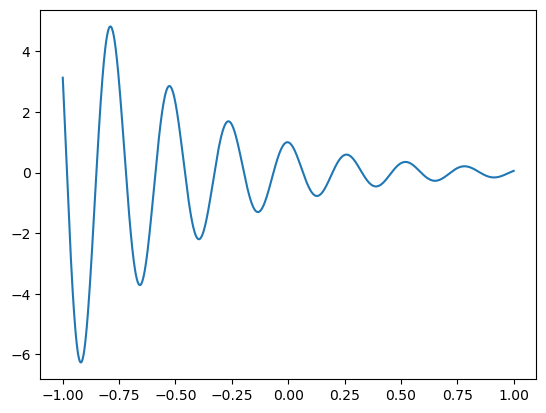

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

time_axis = np.linspace(-1, 1, 1000)
s = (np.exp(-(2)*time_axis) * np.cos(24 * time_axis))

plt.plot(time_axis, s)
plt.show

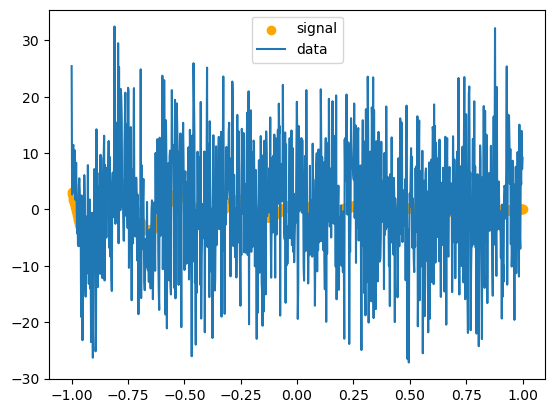

In [11]:
n = np.random.randn(1000)*10

d = s + n

plt.scatter(time_axis, s, label ='signal', c = 'orange')
plt.plot(time_axis, d, label = 'data')
plt.legend()
plt.show()

In [3]:
def WaveLine(params):
    omega = params[0]
    gamma = params[1]

    return (np.exp(-(gamma)*time_axis) * np.cos(omega * time_axis))

WaveLine([2, 3])

array([-8.35853265e+00, -8.23572516e+00, -8.11395745e+00, -7.99322344e+00,
       -7.87351702e+00, -7.75483212e+00, -7.63716271e+00, -7.52050273e+00,
       -7.40484619e+00, -7.29018710e+00, -7.17651948e+00, -7.06383738e+00,
       -6.95213487e+00, -6.84140603e+00, -6.73164499e+00, -6.62284586e+00,
       -6.51500280e+00, -6.40810997e+00, -6.30216157e+00, -6.19715181e+00,
       -6.09307492e+00, -5.98992515e+00, -5.88769677e+00, -5.78638408e+00,
       -5.68598138e+00, -5.58648302e+00, -5.48788335e+00, -5.39017674e+00,
       -5.29335760e+00, -5.19742034e+00, -5.10235940e+00, -5.00816924e+00,
       -4.91484434e+00, -4.82237920e+00, -4.73076835e+00, -4.64000632e+00,
       -4.55008770e+00, -4.46100706e+00, -4.37275901e+00, -4.28533818e+00,
       -4.19873922e+00, -4.11295680e+00, -4.02798562e+00, -3.94382039e+00,
       -3.86045585e+00, -3.77788675e+00, -3.69610788e+00, -3.61511402e+00,
       -3.53490002e+00, -3.45546070e+00, -3.37679093e+00, -3.29888559e+00,
       -3.22173961e+00, -

In [8]:
def ChiSquared(params):
    t = WaveLine(params)

    chisq = np.sum((d - t)**2)

    return chisq

result = least_squares(ChiSquared, [1.5, 23.5], ftol= 1e-12)

result.x

array([24.23714107,  2.16803297])

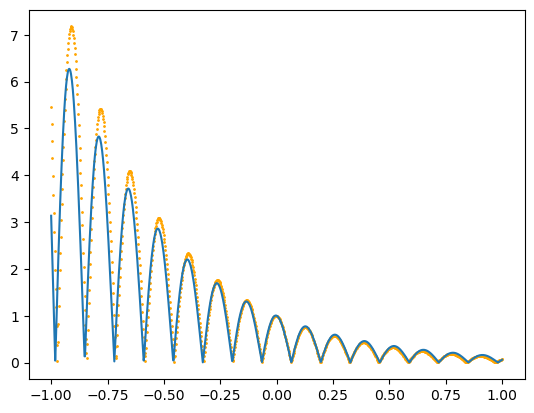

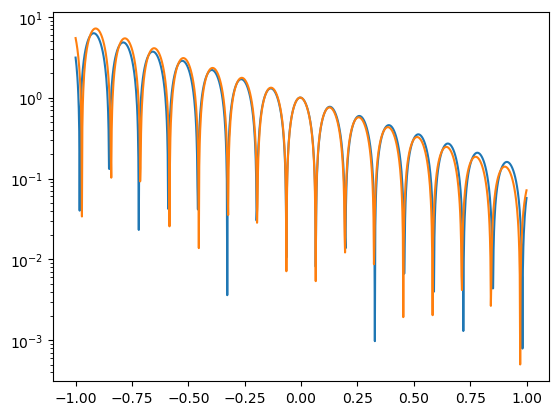

In [9]:
result.x


time_axis = np.linspace(-1, 1, 1000)
s0 = (np.exp(-(2)*time_axis) * np.cos(24 * time_axis))
s1 = (np.exp(-(result.x[1])*time_axis) * np.cos(result.x[0] * time_axis))



plt.plot(time_axis, abs(s0))
plt.scatter(time_axis, abs(s1), s=1, c='orange')
plt.show()


plt.semilogy(time_axis, abs(s0))
plt.semilogy(time_axis, abs(s1))
plt.show()




This only works if you try keeping the values of [0], [0] in code box 4 to something close to original parameters in code box 1 because otherwise the algorithm gets stuck at crest/trough 
This is simple minimization of the function

Chisquared = log likelihood